In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
    }
plt.rcParams.update(tex_fonts)

# Preprocess data

In [2]:
# read in data
df = pd.read_csv('../air_weather_data/pollution_and_weather_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M') # change time column to pandas datetime
df = df.set_index('Date') # date column as index

In [3]:
# create separate dataframes

# df_PM10 = df['PM$_{10}$, Torkel Knutssonsgatan'].to_frame()
# df_PM2p5 = df['PM$_{2.5}$, Torkel Knutssonsgatan'].to_frame()

df_PM10 = df[['PM$_{10}$, Torkel Knutssonsgatan', 
              'PM$_{10}$, Hornsgatan', 
              'PM$_{10}$, Norr Malma',
              'PM$_{2.5}$, Torkel Knutssonsgatan', 
              'PM$_{2.5}$, Hornsgatan', 
              'PM$_{2.5}$, Norr Malma'
              ]]

df_PM2p5 = df[['PM$_{2.5}$, Torkel Knutssonsgatan', 
               'PM$_{2.5}$, Hornsgatan', 
               'PM$_{2.5}$, Norr Malma',
               'PM$_{10}$, Torkel Knutssonsgatan', 
               'PM$_{10}$, Hornsgatan', 
               'PM$_{10}$, Norr Malma'
               ]]

In [4]:
# drop negative and zero values and interpolate
df_PM10[df_PM10 <= 0] = np.NaN
df_PM10.interpolate(inplace=True)

df_PM2p5[df_PM2p5 <= 0] = np.NaN
df_PM2p5.interpolate(inplace=True)

/var/folders/3k/1wztchzs50j4jyq74xpccr3m0000gn/T/ipykernel_7029/4134975453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PM10[df_PM10 <= 0] = np.NaN
/var/folders/3k/1wztchzs50j4jyq74xpccr3m0000gn/T/ipykernel_7029/4134975453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PM10[df_PM10 <= 0] = np.NaN
/var/folders/3k/1wztchzs50j4jyq74xpccr3m0000gn/T/ipykernel_7029/4134975453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [5]:
# create lagged values

# PM10 predictions
df_PM10['PM$_{10}$, Torkel Knutssonsgatan lag1'] = df_PM10['PM$_{10}$, Torkel Knutssonsgatan'].shift(1)
df_PM10['PM$_{10}$, Torkel Knutssonsgatan lag2'] = df_PM10['PM$_{10}$, Torkel Knutssonsgatan'].shift(2)
df_PM10['PM$_{10}$, Hornsgatan lag1'] = df_PM10['PM$_{10}$, Hornsgatan'].shift(1)
df_PM10['PM$_{10}$, Norr Malma lag1'] = df_PM10['PM$_{10}$, Norr Malma'].shift(1)
df_PM10['PM$_{2.5}$, Torkel Knutssonsgatan lag1'] = df_PM10['PM$_{2.5}$, Torkel Knutssonsgatan'].shift(1)
df_PM10['PM$_{2.5}$, Hornsgatan lag1'] = df_PM10['PM$_{2.5}$, Hornsgatan'].shift(1)
df_PM10['PM$_{2.5}$, Norr Malma lag1'] = df_PM10['PM$_{2.5}$, Norr Malma'].shift(1)

df_PM10.dropna(inplace=True)

# PM2.5 predictions
df_PM2p5['PM$_{2.5}$, Torkel Knutssonsgatan lag1'] = df_PM2p5['PM$_{2.5}$, Torkel Knutssonsgatan'].shift(1)
df_PM2p5['PM$_{2.5}$, Torkel Knutssonsgatan lag2'] = df_PM2p5['PM$_{2.5}$, Torkel Knutssonsgatan'].shift(2)
df_PM2p5['PM$_{2.5}$, Hornsgatan, lag1'] = df_PM2p5['PM$_{2.5}$, Hornsgatan'].shift(1)
df_PM2p5['PM$_{2.5}$, Norr Malma, lag1'] = df_PM2p5['PM$_{2.5}$, Norr Malma'].shift(1)
df_PM2p5['PM$_{10}$, Torkel Knutssonsgatan lag1'] = df_PM2p5['PM$_{10}$, Torkel Knutssonsgatan'].shift(1)
df_PM2p5['PM$_{10}$, Hornsgatan, lag1'] = df_PM2p5['PM$_{10}$, Hornsgatan'].shift(1)
df_PM2p5['PM$_{10}$, Norr Malma, lag1'] = df_PM2p5['PM$_{10}$, Norr Malma'].shift(1)


df_PM2p5.dropna(inplace=True)

/var/folders/3k/1wztchzs50j4jyq74xpccr3m0000gn/T/ipykernel_7029/287243627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PM10['PM$_{10}$, Torkel Knutssonsgatan lag1'] = df_PM10['PM$_{10}$, Torkel Knutssonsgatan'].shift(1)
/var/folders/3k/1wztchzs50j4jyq74xpccr3m0000gn/T/ipykernel_7029/287243627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PM10['PM$_{10}$, Torkel Knutssonsgatan lag2'] = df_PM10['PM$_{10}$, Torkel Knutssonsgatan'].shift(2)
/var/folders/3k/1wztchzs50j4jyq74xpccr3m0000gn/T/ipy

In [6]:
# split into train an test sets
df_PM10_train = df_PM10.loc['2016-01-01':'2019-01-01']
df_PM10_test = df_PM10['2020-09-01 00:00:00':]

df_PM2p5_train = df_PM2p5.loc['2016-01-01':'2019-01-01']
df_PM2p5_test = df_PM2p5['2020-09-01 00:00:00':]

In [ ]:
# log transform training data

df_PM10_train_log = np.log(df_PM10_train)
df_PM2p5_train_log = np.log(df_PM2p5_train)

In [ ]:
# Create X and y frames

y_PM10 = df_PM10_train_log['PM$_{10}$, Torkel Knutssonsgatan']
X_PM10 = df_PM10_train_log[[i for i in df_PM10_train_log.columns if i[-4:-1] == 'lag']]
X_PM10.insert(0, 'intercept', 1) # insert a 1

y_PM2p5 = df_PM2p5_train_log['PM$_{2.5}$, Torkel Knutssonsgatan']
X_PM2p5 = df_PM2p5_train_log[[i for i in df_PM2p5_train_log.columns if i[-4:-1] == 'lag']]
X_PM2p5.insert(0, 'intercept', 1)

# Fit OLS models

In [ ]:
# PM10
lmod_PM10 = sm.OLS(y_PM10, X_PM10).fit()
print(lmod_PM10.summary())#.as_latex())

In [ ]:
# PM2.5
lmod_PM2p5 = sm.OLS(y_PM2p5,X_PM2p5).fit()
print(lmod_PM2p5.summary())#.as_latex())
# for table in lmod_PM2p5.summary().tables:
#     print(table.as_latex_tabular())

# Make predictions on new data

In [11]:
# PM10
y_test_PM10 = df_PM10_test['PM$_{10}$, Torkel Knutssonsgatan'] # keep the target y in original scale
df_PM10_test = df_PM10_test.drop([i for i in df_PM10_test.columns if i[-4:-1] != 'lag'],axis=1) # only lagged values left
df_PM10_test = np.log(df_PM10_test) # log transform

# PM2.5
y_test_PM2p5 = df_PM2p5_test['PM$_{2.5}$, Torkel Knutssonsgatan'] # keep the target y in original scale
df_PM2p5_test = df_PM2p5_test.drop([i for i in df_PM2p5_test.columns if i[-4:-1] != 'lag'],axis=1) # only lagged values left
df_PM2p5_test = np.log(df_PM2p5_test) # log transform

In [ ]:
df_PM10_test.insert(0, 'intercept', 1)
df_PM2p5_test.insert(0, 'intercept', 1)

In [ ]:
df_get_predictions_PM10 = np.exp(lmod_PM10.get_prediction(df_PM10_test).summary_frame()) # if log transformed
# df_get_predictions_PM10 = lmod_PM10.get_prediction(df_PM10_test).summary_frame() # if not logged
df_get_predictions_PM10.rename(columns={'mean':'PM$_{10}$, predictions'}, inplace=True)
df_get_predictions_PM10;

In [ ]:
df_get_predictions_PM2p5 = np.exp(lmod_PM2p5.get_prediction(df_PM2p5_test).summary_frame()) # if log transformed
# df_get_predictions_PM2p5 = lmod_PM2p5.get_prediction(df_PM2p5_test).summary_frame() # if not logged
df_get_predictions_PM2p5.rename(columns={'mean':'PM$_{2.5}$, predictions'}, inplace=True)
df_get_predictions_PM2p5;

In [ ]:
# note: converted back to original scale above
print('MLR RMSE\n------------')
print('PM10, ', np.sqrt(mean_squared_error(df_get_predictions_PM10['PM$_{10}$, predictions'], y_test_PM10)).round(3))
print('PM2.5, ', np.sqrt(mean_squared_error(df_get_predictions_PM2p5['PM$_{2.5}$, predictions'], y_test_PM2p5)).round(3))

print('\nMLR MAPE:\n------------')
print('PM10, ', mean_absolute_percentage_error(df_get_predictions_PM10['PM$_{10}$, predictions'], y_test_PM10).round(3))
print('PM2.5, ',mean_absolute_percentage_error(df_get_predictions_PM2p5['PM$_{2.5}$, predictions'], y_test_PM2p5).round(3))

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, constrained_layout=True, figsize=(5.75, 4.25), sharex=True)
# fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(10, 3), sharex=True)

date1 = '2020-09-25'
date2 = '2020-10-08 00:00:00'

# PM10
y_test_PM10[date1:date2].plot(ax=ax1) # PM10 values
df_get_predictions_PM10[date1:date2]['PM$_{10}$, predictions'].plot(ax=ax1) # PM10 predicted
df_get_predictions_PM10[date1:date2]['obs_ci_lower'].plot(
                        linestyle='dashed', linewidth=.85, color='gray', label='_nolegend_', ax=ax1)
df_get_predictions_PM10[date1:date2]['obs_ci_upper'].plot(
                        linestyle='dashed', linewidth=.85, color='gray', label='_nolegend_', ax=ax1)
ax1.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
ax1.annotate('(a)', xy=(0.0, 1.09), xycoords="axes fraction")
ax1.set_ylabel('$\mu$g/m$^3$')

# PM2.5
y_test_PM2p5[date1:date2].plot(ax=ax2) # PM2.5 values
df_get_predictions_PM2p5[date1:date2]['PM$_{2.5}$, predictions'].plot(ax=ax2) # PM2.5 predicted
df_get_predictions_PM2p5[date1:date2]['obs_ci_lower'].plot(
                        linestyle='dashed', linewidth=.85, color='gray', label='_nolegend_', ax=ax2)
df_get_predictions_PM2p5[date1:date2]['obs_ci_upper'].plot(
                        linestyle='dashed', linewidth=.85, color='gray', label='_nolegend_', ax=ax2)
ax2.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
ax2.annotate('(b)', xy=(0.0, 1.09), xycoords="axes fraction")
ax2.set_ylabel('$\mu$g/m$^3$')

plt.xlabel('')
# plt.savefig('../plots/MLR_PM10.pdf')

# Model diagnostics

In [ ]:
# PM10
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout = True, figsize = (5.5, 3))

# QQ-plot of studentized residuals
sm.qqplot(lmod_PM10.resid, line='q', ax=ax1, marker=".")
ax1.annotate('(a)', xy=(0, 1.09), xycoords="axes fraction")

# fitted vs residuals
ax2.scatter(lmod_PM10.fittedvalues, lmod_PM10.resid, marker=".")#, facecolors='none', edgecolors='#1f77b4')
ax2.axhline(0, color='r')
ax2.set_xlabel('Fitted value')
ax2.set_ylabel('Residuals')
ax2.annotate('(b)', xy=(0, 1.09), xycoords="axes fraction")


ax3.hist(lmod_PM10.resid, edgecolor='black')
ax3.set_xlabel('Residuals')
ax3.set_ylabel('Frequency')
ax3.annotate('(c)', xy=(0, 1.09), xycoords="axes fraction")

lmod_PM10.resid.plot(linestyle="", marker='.', ax=ax4)
ax4.set_xlabel('')
ax4.set_ylabel('Residuals')
ax4.annotate('(d)', xy=(0, 1.09), xycoords="axes fraction")

plt.savefig('../plots/Residual_plots_MLR_PM10.pdf')

In [ ]:
# PM2.5
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout = True, figsize = (5.5, 3))

# QQ-plot of studentized residuals
sm.qqplot(lmod_PM2p5.resid, line='q', ax=ax1, marker=".", alpha=.75)
ax1.annotate('(a)', xy=(0, 1.09), xycoords="axes fraction")

# fitted vs residuals
ax2.scatter(lmod_PM2p5.fittedvalues, lmod_PM2p5.resid, marker=".", alpha=.75)#, facecolors='none', edgecolors='#1f77b4')
ax2.axhline(0, color='r')
ax2.set_xlabel('Fitted value')
ax2.set_ylabel('Residuals')
ax2.annotate('(b)', xy=(0, 1.09), xycoords="axes fraction")


ax3.hist(lmod_PM2p5.resid, edgecolor='black', alpha=.75)
ax3.set_xlabel('Residuals')
ax3.set_ylabel('Frequency')
ax3.annotate('(c)', xy=(0, 1.09), xycoords="axes fraction")

lmod_PM2p5.resid.plot(linestyle="", marker='.', ax=ax4, alpha=.75)
ax4.set_xlabel('')
ax4.set_ylabel('Residuals')
ax4.annotate('(d)', xy=(0, 1.09), xycoords="axes fraction")

# plt.savefig('../plots/Residual_plots_MLR_PM2.5.pdf')

# Ridge regression

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# PM10
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
# PM2.5
scaler3 = MinMaxScaler()
scaler4 = MinMaxScaler()

# PM10
df_PM10_train_scaled = scaler1.fit_transform(df_PM10['2016-01-01':'2019-01-01'][[i for i in df_PM10_train.columns if i[-4:-1] == 'lag']])
y_PM10_train_scaled = scaler2.fit_transform(df_PM10['2016-01-01':'2019-01-01']['PM$_{10}$, Torkel Knutssonsgatan'].to_frame())
df_PM10_test_scaled = scaler1.transform(df_PM10['2020-09-01':][[i for i in df_PM10_test.columns if i[-4:-1] == 'lag']])

# PM2.5
df_PM2p5_train_scaled = scaler3.fit_transform(df_PM2p5['2016-01-01':'2019-01-01'][[i for i in df_PM2p5_train.columns if i[-4:-1] == 'lag']])
y_PM2p5_train_scaled = scaler4.fit_transform(df_PM2p5['2016-01-01':'2019-01-01']['PM$_{2.5}$, Torkel Knutssonsgatan'].to_frame())
df_PM2p5_test_scaled = scaler3.transform(df_PM2p5['2020-09-01':][[i for i in df_PM2p5_test.columns if i[-4:-1] == 'lag']])

# (This data is NOT log transformeds)

In [34]:
from itertools import chain
from sklearn import linear_model

n_alphas = 250

alphas = np.logspace(-3, 3, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(df_PM10_train_scaled, y_PM10_train_scaled)
    coefs.append(list(chain(*ridge.coef_)))

alphas_ = np.logspace(-3, 3, n_alphas)
coefs_ = []
for a in alphas_:
    ridge_ = linear_model.Ridge(alpha=a)
    ridge_.fit(df_PM2p5_train_scaled, y_PM2p5_train_scaled)
    coefs_.append(list(chain(*ridge_.coef_)))

1.2717966324154728
0.01


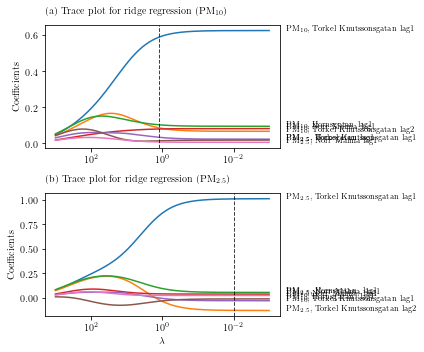

In [35]:
# columns names:
PM10_cols = [i for i in df_PM10_train.columns if i[-4:-1] == 'lag']
PM2p5_cols = [i for i in df_PM2p5_train.columns if i[-4:-1] == 'lag']

# select value of alpha with cross-validation
from sklearn.model_selection import GridSearchCV

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6, 5), tight_layout=True)

# PM10
pars = {'alpha':np.logspace(-2, 2, n_alphas)}
rr = GridSearchCV(linear_model.Ridge(), pars, scoring='r2', cv=10)
rr.fit(df_PM10_train_scaled, y_PM10_train_scaled)
bestalpha = rr.best_params_['alpha']
print(bestalpha)

# PM2.5
pars_ = {'alpha':np.logspace(-2, 2, n_alphas)}
rr_ = GridSearchCV(linear_model.Ridge(), pars_, scoring='r2', cv=10)
rr_.fit(df_PM2p5_train_scaled, y_PM2p5_train_scaled)
bestalpha_ = rr_.best_params_['alpha']
print(bestalpha_)

# ridge trace plot PM10
ax1.plot(alphas, coefs)
ax1.set_xscale('log')
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.annotate('(a) Trace plot for ridge regression (PM$_{10}$)', xy=(0, 1.09), xycoords="axes fraction")
for i in range(len(PM10_cols)):
    ax1.text(min(alphas)/3, coefs[0][i], PM10_cols[i], fontsize=8)

# ridge trace plot PM2.5
ax2.plot(alphas_, coefs_)
ax2.set_xscale('log')
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.annotate('(b) Trace plot for ridge regression (PM$_{2.5}$)', xy=(0, 1.09), xycoords="axes fraction")
for i in range(len(PM2p5_cols)):
    ax2.text(min(alphas_)/3, coefs_[0][i], PM2p5_cols[i], fontsize=8)

ax2.set_xlabel(r'$\lambda$')
ax1.set_ylabel('Coefficients')
ax2.set_ylabel('Coefficients')
ax1.axvline(bestalpha, color='k', linestyle='--', linewidth=1, alpha=.75)
ax2.axvline(bestalpha_, color='k', linestyle='--', linewidth=1, alpha=.75)
plt.savefig('../plots/ridge_regression:_trace.pdf')

In [36]:
# PM10
rrbest = linear_model.Ridge(alpha=bestalpha, fit_intercept=True)
rrbest.fit(df_PM10_train_scaled, y_PM10_train_scaled)
# PM2.5
rrbest_ = linear_model.Ridge(alpha=bestalpha_, fit_intercept=True)
rrbest_.fit(df_PM2p5_train_scaled, y_PM2p5_train_scaled)

print('RMSE\n------------') 
# np.sqrt(mean_squared_error(np.exp(scaler2.inverse_transform(rrbest.predict(df_PM10_test_log_norm))), y_test_PM10)).round(5))
print('PM10 ', np.sqrt(mean_squared_error(scaler2.inverse_transform(rrbest.predict(df_PM10_test_scaled)), y_test_PM10)).round(5))
print('PM2.5 ', np.sqrt(mean_squared_error(scaler4.inverse_transform(rrbest_.predict(df_PM2p5_test_scaled)), y_test_PM2p5)))


print('\nMAPE\n------------')
print('PM10 ', mean_absolute_percentage_error(scaler2.inverse_transform(rrbest.predict(df_PM10_test_scaled)), y_test_PM10).round(3))
print('PM2.5 ', mean_absolute_percentage_error(scaler4.inverse_transform(rrbest_.predict(df_PM2p5_test_scaled)), y_test_PM2p5).round(3))

RMSE
------------
PM10  3.65923
PM2.5  1.2304727839184693

MAPE
------------
PM10  0.272
PM2.5  0.136


Text(0.5, 0, '')

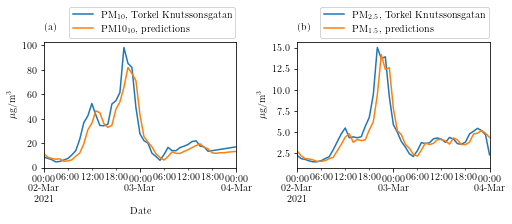

In [71]:

pred_PM10 = scaler2.inverse_transform(rrbest.predict(df_PM10_test_scaled))
y_test_PM10_ = y_test_PM10.to_frame()
y_test_PM10_['PM10$_{10}$, predictions'] = pred_PM10[:]

pred_PM2p5 = scaler4.inverse_transform(rrbest_.predict(df_PM2p5_test_scaled))
y_test_PM2p5_ = y_test_PM2p5.to_frame()
y_test_PM2p5_['PM$_{1.5}$, predictions'] = pred_PM2p5[:]

date1 = '2021-03-02 00:00:00'
date2 = '2021-03-04 00:00:00'

fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(7, 3), sharex=True)

y_test_PM10_[date1:date2].plot(ax=ax1)
ax1.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
ax1.annotate('(a)', xy=(0.0, 1.09), xycoords="axes fraction")
ax1.set_ylabel('$\mu$g/m$^3$')

y_test_PM2p5_[date1:date2].plot(ax=ax2)
ax2.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
ax2.annotate('(b)', xy=(0.0, 1.09), xycoords="axes fraction")
ax2.set_ylabel('$\mu$g/m$^3$')
plt.xlabel('')

# plt.savefig('../plots/MLR_Ridge_PM10.pdf')

<AxesSubplot:xlabel='Date'>

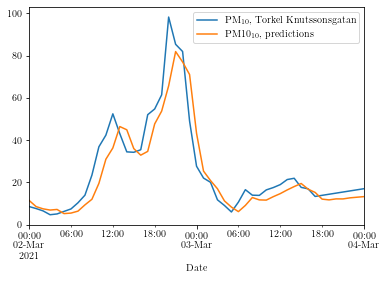

In [68]:
y_test_PM10_['2021-03-02 00:00:00':'2021-03-04 00:00:00'].plot()